In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

# Amazon AI Service -- Rekognition Demo

In [3]:
from IPython.display import Image
import boto3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='alwaysandeep', api_key='eKZcMTk2w3iXZITbstJ1')


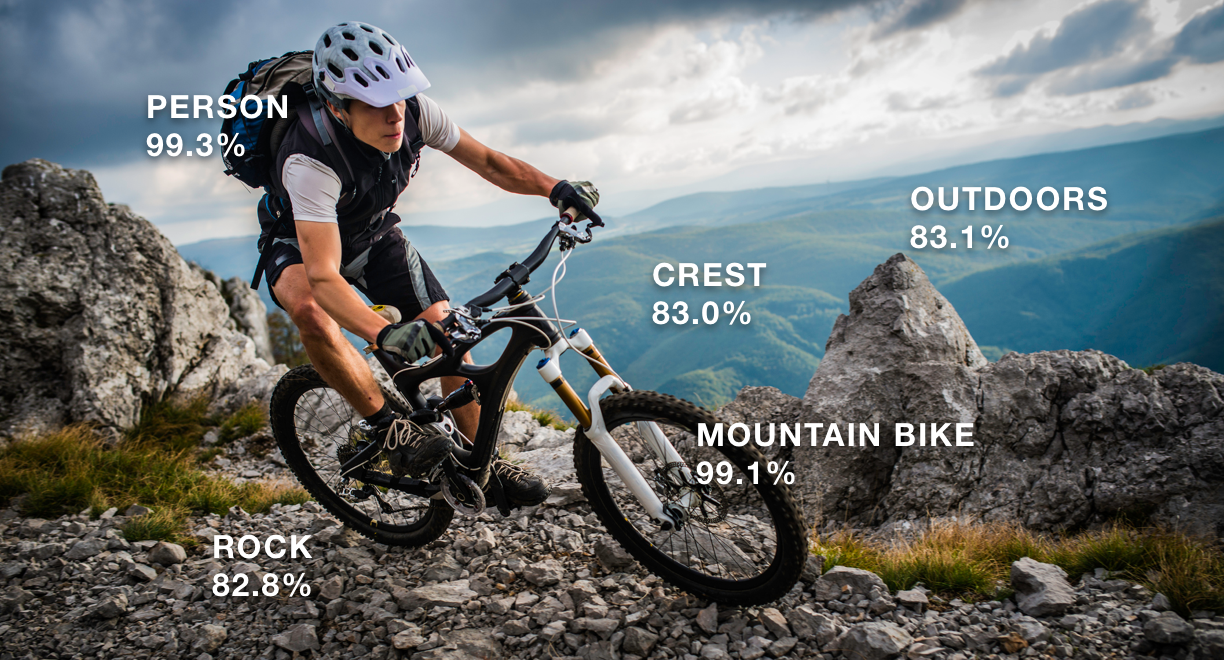

In [4]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/detect labels/official_dl.jpg")

In [4]:
#### User Defined function
BUCKET = "awsrekognition-demo1"
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
def detect_labels(bucket, fileName,MinConfidence=75,max_labels=10, region="us-east-1"):
    rekognition = boto3.client("rekognition", region)
    response = rekognition.detect_labels(Image={'S3Object':{'Bucket':bucket,'Name':fileName}},MinConfidence=MinConfidence,MaxLabels=max_labels)
    properties=dict()
    print('Detected labels for ' + fileName)
    for label in response['Labels']:
        #print(bcolors.BOLD+"{0:20} Confidence {1} %".format(label['Name'],round(label['Confidence'],3))+bcolors.ENDC)
        #print("{0:20} Confidence {1} %".format(label['Name'],round(label['Confidence'],3)))
        print('\x1b[3;30;43m'+"{0:20} Confidence {1} %".format(label['Name'],round(label['Confidence'],3))+'\x1b[0m')
        properties[label['Name']]=round(label['Confidence'],3)
    return(properties)
    #return(dict(sorted(properties.items(), key=lambda x: x[1])))
def display_labels(prop):
    layout = go.Layout(
        title='Detected labels in the image',
    )
    data = [go.Bar(
                x=prop.keys(),
                y=prop.values()
        )]

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='color-bar')
 

## Image-1 

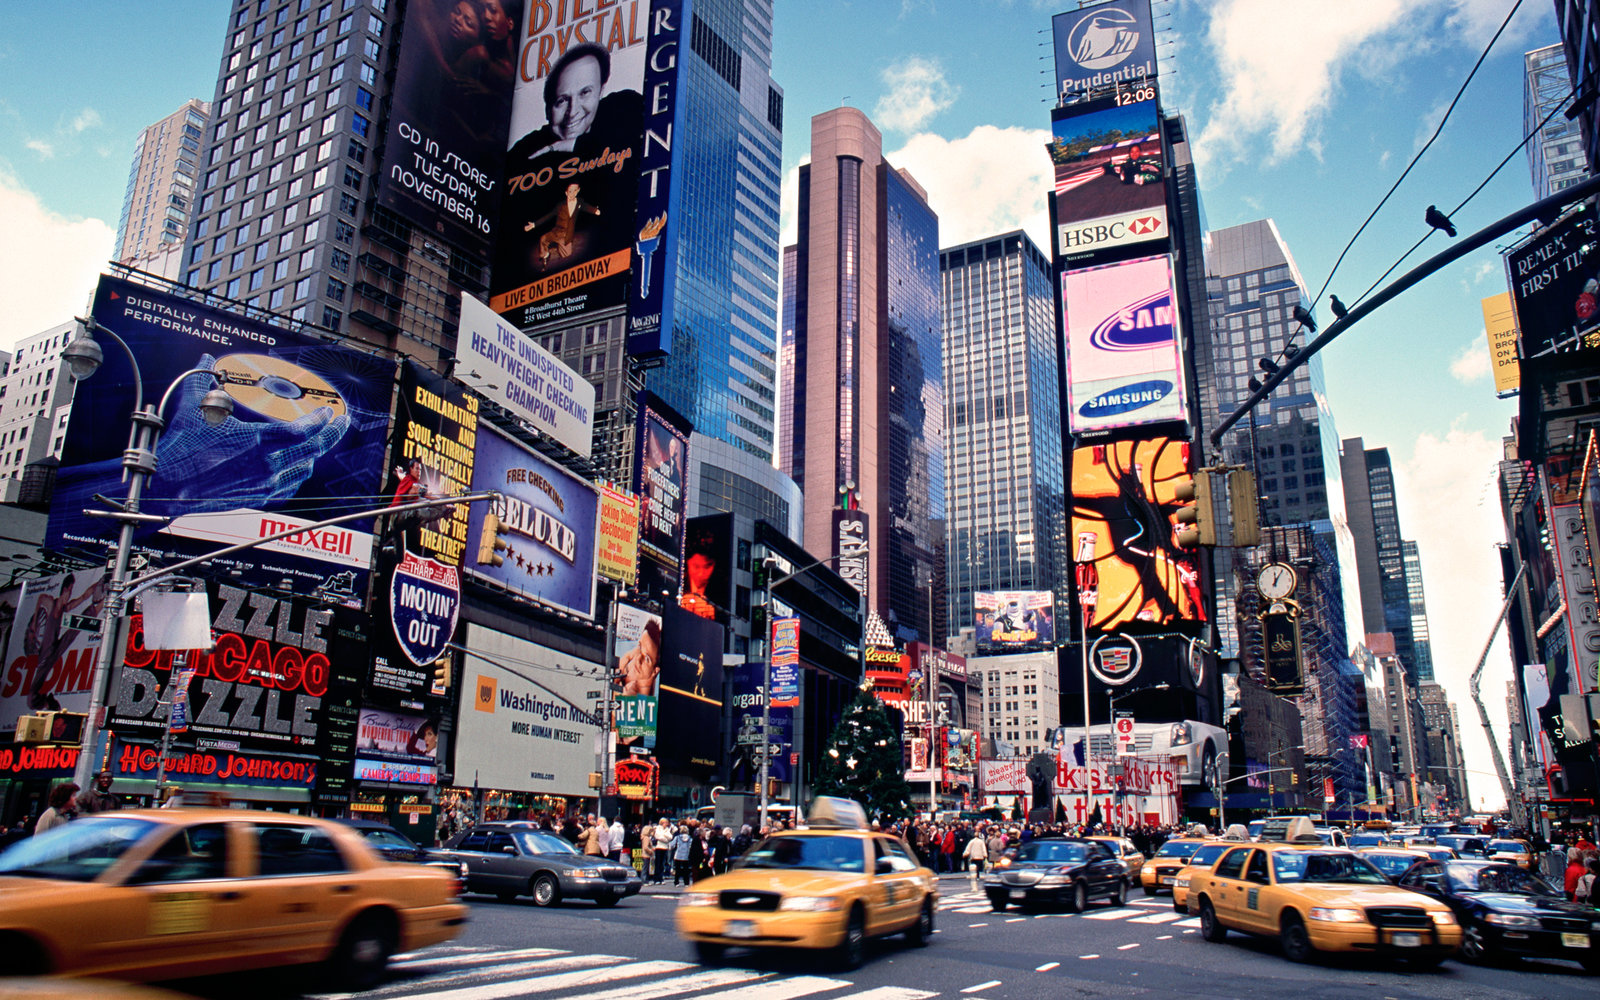

In [5]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/detect labels/image1_dl.jpg")

In [7]:
KEY = "image1_dl.jpg"
prop=detect_labels(BUCKET, KEY,MinConfidence=40,max_labels=10, region="us-east-1")
display_labels(prop)

Detected labels for image1_dl.jpg
Cab                  Confidence 95.585 %
Car                  Confidence 95.585 %
Taxi                 Confidence 95.585 %
Vehicle              Confidence 95.585 %
Automobile           Confidence 84.446 %
City                 Confidence 83.994 %
Downtown             Confidence 83.994 %
Urban                Confidence 83.994 %
Billboard            Confidence 83.58 %
Flyer                Confidence 81.235 %


## Image-2

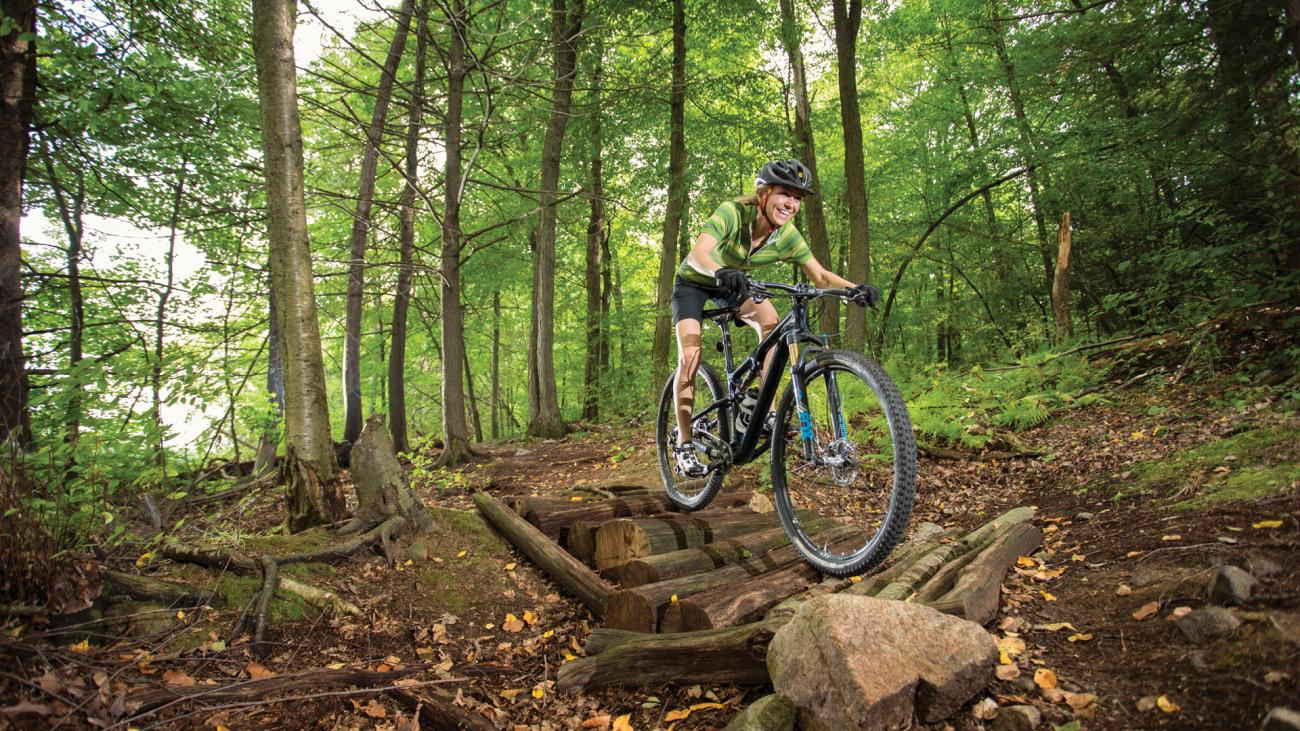

In [8]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/detect labels/image2_dl.jpg")

In [9]:
KEY = "image2_dl.jpg"
prop=detect_labels(BUCKET, KEY,MinConfidence=75,max_labels=6, region="us-east-1")
display_labels(prop)

Detected labels for image2_dl.jpg
People               Confidence 98.332 %
Person               Confidence 98.332 %
Human                Confidence 98.187 %
Bicycle              Confidence 97.964 %
Bike                 Confidence 97.964 %
Vehicle              Confidence 97.964 %


## Image-3

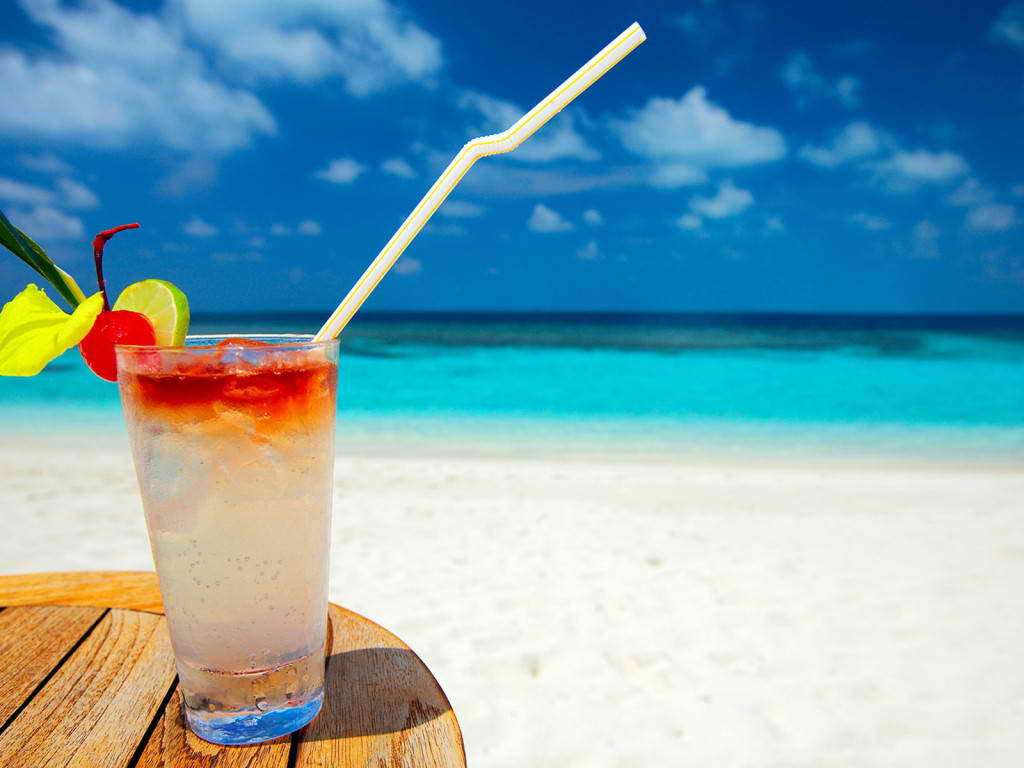

In [10]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/detect labels/image3_dl.jpg")

In [10]:
KEY = "image3_dl.jpg"
prop=detect_labels(BUCKET, KEY,MinConfidence=20,max_labels=20, region="us-east-1")
display_labels(prop)

Detected labels for image3_dl.jpg
Alcohol              Confidence 98.921 %
Beverage             Confidence 98.921 %
Cocktail             Confidence 98.921 %
Drink                Confidence 98.921 %
Hardwood             Confidence 69.784 %
Stained Wood         Confidence 69.784 %
Wood                 Confidence 69.784 %
Juice                Confidence 67.473 %
Mint                 Confidence 66.954 %
Mojito               Confidence 66.954 %
Lumber               Confidence 61.742 %
Table                Confidence 51.388 %
Tabletop             Confidence 51.388 %


## Image-4

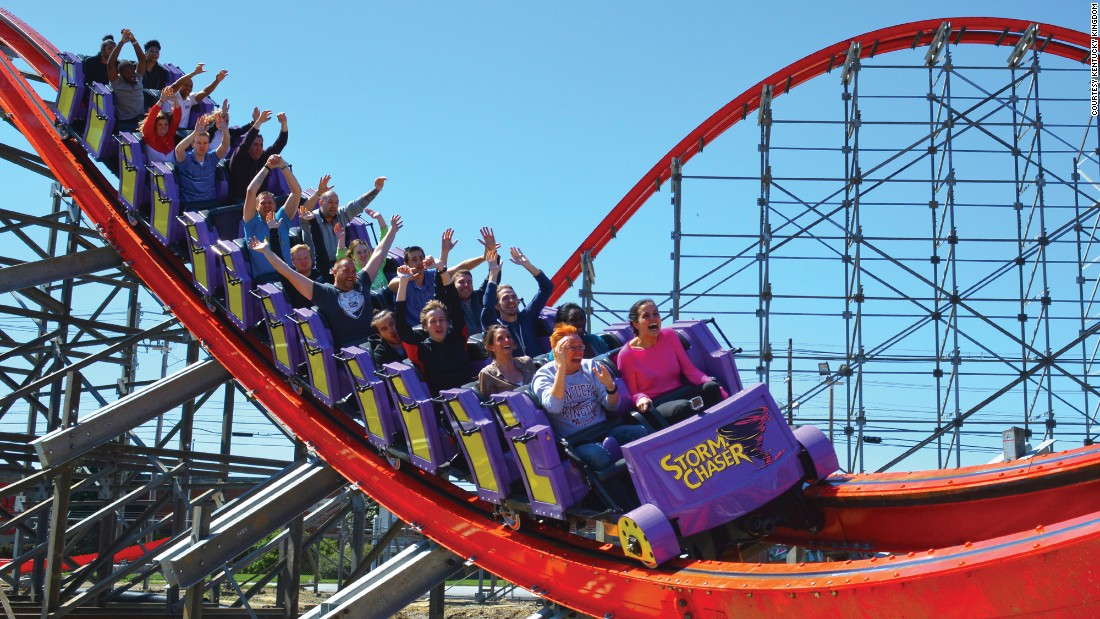

In [18]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/detect labels/image4_dl.jpg")

In [19]:
KEY = "image4_dl.jpg"
prop=detect_labels(BUCKET, KEY,MinConfidence=75,max_labels=6, region="us-east-1")
display_labels(prop)

Detected labels for image4_dl.jpg
Coaster              Confidence 99.264 %
Roller Coaster       Confidence 99.264 %
Playground           Confidence 79.784 %
